# Twitter API and Data Visualization

Sources and Inspiration: [Class of Roberta Sinatra](http://www.robertasinatra.com/teaching/math5012.html) and [Mining the Social Web](https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition)

- #### Today we play some statistical games with `random` and visualize its results with `matplotlib`
- #### We will learn how to use the `Twitter API` and plot trending topics

### Random 

As statistics students we must learn about the outstanding `random` package. This lets us do stochastic simulations by giving us a pseudorandom number generator.

The minimum a programming language needs for this is a function that gives you access to random floats between zero and one. Python does this:

In [1]:
import random

for _ in range(5): # underscore makes a handy dummy variable
    print random.random()

0.122068567831
0.757847132893
0.172968985819
0.502919011087
0.42346077761


Let's write a function which choose a random element with replacement three times!

In [2]:
my_list=['apple', 'ball', 'cat']

# sample w/ replacement four times:
for i in range(3):
    for _ in range(3):
        #print _
        r = random.random()*len(my_list) # r in [0,4)
    #print r, int(r)
    print my_list[int(r)] 


cat
apple
apple


It is quit complicated, thanks to `random` we can do it much easier!

In [4]:
for _ in range(3): #range is the sample size
    print random.choice(my_list)

cat
ball
ball


Without replacement?
If we want to sample without replacement, meaning the same element cannot be selected more than once, we can use `random.sample`:

In [5]:
numbers=range(100)
print random.sample(numbers, 5) # make five draws 

[34, 83, 7, 88, 78]


## Matplotlib

`matplotlib` is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. `matplotlib` can be used in python scripts, the python and ipython shell (ala MATLAB®* or Mathematica®†), web application servers, and six graphical user interface toolkits. [source](http://matplotlib.org/)

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.

`Matplotlib` is probably not the fanciest package for data visualization, but the easiest to create charts which are appropriate for scientific publications (eg.: thesis). And it provides the basic syntax to most of the super sexy interactive libaries, suchas `Bokeh` or `Lightning`. `matplotlib` has a super detailed documentation. Thanks to its popularity if you google for any chart type answers are easily accessable at stackoverflow. 

More information at the Matplotlib web page: http://matplotlib.org/ . There's a [nice gallery](http://matplotlib.org/gallery.html) worth checking out.

Resources:
* http://kestrel.nmt.edu/~raymond/software/python_notes/paper004.html

In [6]:
import matplotlib
import matplotlib.pyplot as plt
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline

## MATLAB-like API
The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. To use this API from matplotlib, we need to include the symbols in the `pylab` module: 

In [7]:
x = range(0, 10)
y = [i ** 2 for i in x]

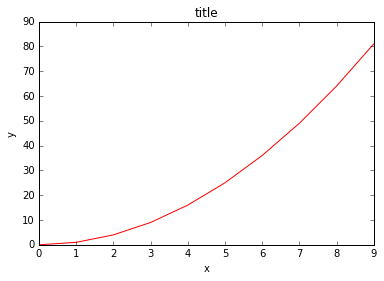

In [8]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

If we would like to get rid of the `plt.` part, we need to include the symbols in the `pylab` module: 

To use this API from matplotlib, we need to include the symbols in the `pylab` module: ort

In [9]:
from pylab import *

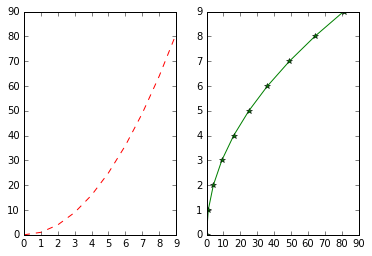

In [10]:
subplot(1,2,1)  #creating subplots
plot(x, y, 'r--') #colors,and line type
subplot(1,2,2)
plot(y, x, 'g*-');

This Matlab API is very easy to use, but not too efficient, it is good only for the simplest figures.
Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API
The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

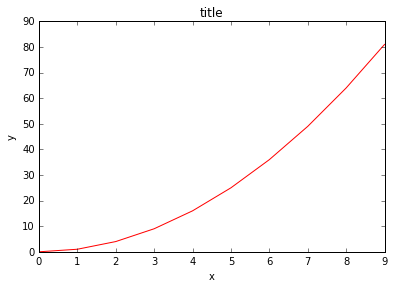

In [11]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

How to make the subplots?

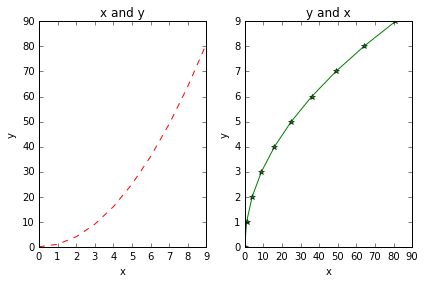

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
colors=['r--', 'g*-']
labels=[['x','y'], ['x','y']]
variables=[x,y,x]
titles=['x and y', 'y and x']

for i in range(2): 
    axes[i].set_xlabel(labels[i][0])
    axes[i].set_ylabel(labels[i][1])
    axes[i].set_title(titles[i])
    axes[i].plot(variables[i], variables[i+1], colors[i])
fig.tight_layout()      


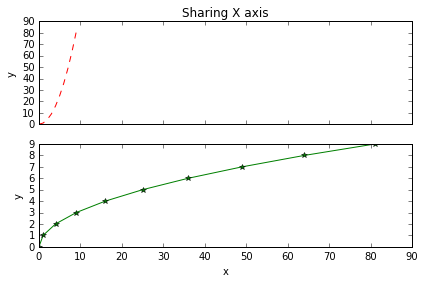

In [13]:
#Without a loop with a shared ax
fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(x, y, 'r--')
axes[0].set_title('Sharing X axis')
axes[0].set_ylabel('y')
axes[1].plot(y, x, 'g*-')
axes[1].set_ylabel('y')
axes[1].set_xlabel('x')
fig.tight_layout()


###  Saving figures

In [14]:
fig.savefig("filename.png", dpi=200)

In [15]:
dir
#ls

Data Analysis with Python Lecture 4.html
Data Analysis with Python Lecture 4.ipynb
clinton_tweets.json
clinton_tweets.txt
filename.png
flips.txt
trump_tweets.txt


Let's flip a coin 1000 times, where $p$ is the probability the coin lands on *H*:

In [16]:
import random
p = 0.7

# Flip the coin 1000 times:
flips = []
while len(flips) < 1000:
    if random.random() < p:
        flips.append("H") #H: heads
    else:
        flips.append("T") #T: tails
print flips[:10]

['H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'T']


In [17]:
flips_one=['H' if random.random()<p  else 'T' for i in range(1000)]

In [18]:
flips_one[:10]

['H', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H']

We want to count how many times we see 5 heads in a row, 6 in a row, etc.:

1. Convert the list of `H`'s and `T`'s into a single string `HHTHHHTH...`.
2. Split that string into a list of substrings whenever there's a `T`.
3. Count how long each non-empty string is.
4. Count how many times we see each value from 3.

In [22]:
S = "".join( flips ) # join each flip by an empty delimiter
print S[:50]

HTHTHTHHHTHHTHHTHHTHTHTHHHHHTHHHHHHHHHHHHHHTHHHHHH


In [23]:
heads=S.split('T')
heads[:10]

['H', 'H', 'H', 'HHH', 'HH', 'HH', 'HH', 'H', 'H', 'HHHHH']

In [24]:
run_lengths = [ len(run) for run in heads if run!='' ]
print run_lengths[:8]

[1, 1, 1, 3, 2, 2, 2, 1]


In [25]:
from collections import Counter

run2count=Counter(run_lengths)

In [26]:
run2count

Counter({1: 62,
         2: 46,
         3: 24,
         4: 23,
         5: 16,
         6: 14,
         7: 8,
         8: 4,
         9: 5,
         10: 2,
         11: 2,
         12: 1,
         14: 1,
         16: 1})

Great! We have statistics, now we can create plots!

In [27]:
# split run and count into separate lists:
run_count = run2count.items()
print run_count

run,count = zip(*run_count)
print run,count

[(1, 62), (2, 46), (3, 24), (4, 23), (5, 16), (6, 14), (7, 8), (8, 4), (9, 5), (10, 2), (11, 2), (12, 1), (14, 1), (16, 1)]
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16) (62, 46, 24, 23, 16, 14, 8, 4, 5, 2, 2, 1, 1, 1)


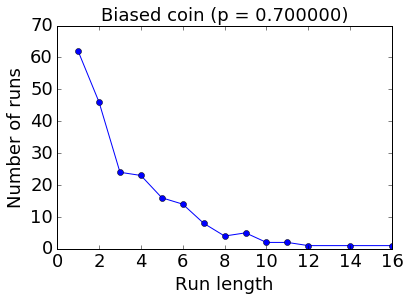

In [28]:
fig, axes = plt.subplots()
axes.plot( run, count, 'o-' )

axes.set_xlabel("Run length", fontsize=18)
axes.set_ylabel("Number of runs", fontsize=18)
axes.set_title("Biased coin (p = %f)" % p, fontsize=18);

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [29]:
prun=[p**r for r in run]

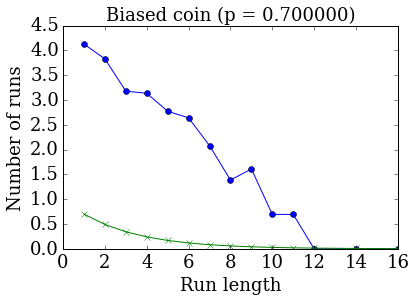

In [30]:
# for fun, try plotting run vs. log(count) and compare it to 
# run vs. p**run.

log_count=[log(c) for c  in count]
fig, axes = plt.subplots()
#axes.plot( run, count, '*-' )
axes.plot( run, log_count, 'o-' )
axes.plot( run, prun, 'x-' )

axes.set_xlabel("Run length", fontsize=18)
axes.set_ylabel("Number of runs", fontsize=18)
axes.set_title("Biased coin (p = %f)" % p, fontsize=18);

## Bar charts make much more sense, so let's use them!

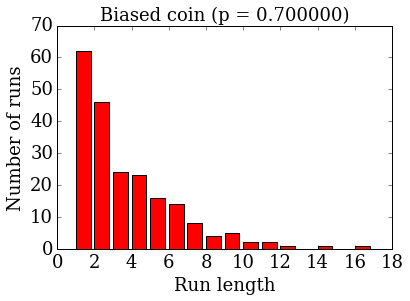

In [31]:
plt.bar( run, count, fc="red" ) # Look, here we are using another way of plotting! 
plt.xlabel("Run length", fontsize=18)
plt.ylabel("Number of runs", fontsize=18)
plt.title("Biased coin (p = %f)" % p, fontsize=18)
plt.show()

## Data Collelction with the Twitter API

With Twitter data our aim is to learn about the followings:

- Twitter's developer platform and how to make API requests

- Tweet metadata and how to use it

- Extracting entities such as user mentions, hashtags, and URLs from tweets

- Techniques for performing frequency analysis with Python



### The Twitter Terminology

Twitter is a real-time, social microblogging service that allows users to post short status updates, called tweets.
Tweets may include one or more entities in their 140 characters of content and reference one or more places that map to locations in the real world. An understanding of users, tweets, and timelines is particularly essential to effective use of Twitter's API, so a brief introduction to these fundamental Twitter Platform objects is in order before we interact with the API to fetch some data. 

To make it all a bit more concrete, let's consider a sample tweet with the following text:

    @Orsi_Vasarhelyi preparing the #dataanalysis class 4students @ELTE_TATK  in Barcelona. Thx @SocialWebMining http://on.fb.me/16WJAf9 #Python

The tweet is exactly 140 characters long and contains four tweet entities: the user mentions @Orsi_Vasarhelyi and @ELTE_TAK, the hashtag #dataanalysis and #Python and the URL http://on.fb.me/16WJAf9. Although there is a place called Barcelona that's explicitly mentioned in the tweet, the places metadata associated with the tweet might include the location in which the tweet was authored, which may or may not be Barcelona, and based on the text noone knows is it Barcelona in Spain or Venezuela. That rich metadata can unambiguously refer to multiple other Twitter users, link to web pages, and cross-reference topics with hashtags that act as points of aggregation and horizontally slice through the entire Twitterverse in an easily searchable fashion. This linkage makes Twitter a very popular data source among network scientists and social epidemiologists.

`Timelines` are the chronologically sorted collections of tweets. Abstractly, you might say that a timeline is any particular collection of tweets displayed in chronological order; however, you'll commonly see a couple of timelines that are particularly noteworthy. 


### What do we need to access the API

1. If you do not have a Twitter account, which is required for API access it is time to create one(do not forget to add your phone number at settings/mobile and verify the code), then review Twitter’s liberal terms of service, API documentation, and Developer Rules of the Road. 

2. Twitter has a simple [RESTful](https://en.wikipedia.org/wiki/Representational_state_transfer) API that is intuitive and easy to use. Even so, there are great libraries available to further mitigate the work involved in making API requests. A particularly beautiful Python package that wraps the Twitter API and mimics the public API semantics almost one-to-one is `twitter`. So please, install it with pip/conda.

3. Before you can make any API requests to Twitter, you'll need to create an application at https://dev.twitter.com/apps. Creating an application is the standard way for developers to gain API access and for Twitter to monitor and interact with third-party platform developers as needed. The process for creating an application is pretty standard, and all that's needed is read-only access to the API. 
For simplicity of development, the key pieces of information that you'll need to take away from your newly created application's settings are its consumer key, consumer secret, access token, and access token secret. In tandem, these four credentials provide everything that an application would ultimately be getting to authorize itself through a series of redirects involving the user granting authorization, so treat them with the same sensitivity that you would a password

In [32]:
!pip install twitter
#https://pypi.python.org/pypi/twitter

    100% |████████████████████████████████| 61kB 890kB/s 


In [33]:
#So let's import twitter and fill the gaps from your Application Settings and Access Token

import twitter

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print twitter_api

This indicates that we've successfully used OAuth credentials to gain authorization to query Twitter's API.

### Now time to see the trending topics!

First, let's have a look at [GET trends/place](https://dev.twitter.com/rest/reference/get/trends/place) objects' official Documentation.

In [34]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/


WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print world_trends[0]

{u'created_at': u'2016-10-02T13:37:20Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23%D8%B1%D8%A7%D8%AD_%D9%86%D9%81%D9%84%D8%B3%D9%83%D9%85_%D9%A2', u'query': u'%23%D8%B1%D8%A7%D8%AD_%D9%86%D9%81%D9%84%D8%B3%D9%83%D9%85_%D9%A2', u'tweet_volume': None, u'name': u'#\u0631\u0627\u062d_\u0646\u0641\u0644\u0633\u0643\u0645_\u0662', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%22Diego+Alves%22', u'query': u'%22Diego+Alves%22', u'tweet_volume': 41399, u'name': u'Diego Alves', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23MeuVotoVaiPara', u'query': u'%23MeuVotoVaiPara', u'tweet_volume': 20911, u'name': u'#MeuVotoVaiPara', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=Stoke', u'query': u'Stoke', u'tweet_volume': 97729, u'name': u'Stoke', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%22Joe+Allen%22', u'query': u'%22Joe+Allen%22', u'tweet_volume': 25275, u'name': u'Joe Allen', u'promoted_content':

In [35]:
type(world_trends)

twitter.api.TwitterListResponse

## What is a Json file?
JSON is a data exchange format that you will encounter on a regular basis. In a nutshell, JSON provides a way to arbitrarily store maps, lists, primitives such as numbers and strings, and combinations of them. In other words, you can theoretically model just about anything with JSON should you desire to do so. 

In [36]:
import json
print json.dumps(us_trends, indent=1)

[
 {
  "created_at": "2016-10-02T13:32:09Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23SundayMorning", 
    "query": "%23SundayMorning", 
    "tweet_volume": 13284, 
    "name": "#SundayMorning", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23CNNSOTU", 
    "query": "%23CNNSOTU", 
    "tweet_volume": null, 
    "name": "#CNNSOTU", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=Stoke", 
    "query": "Stoke", 
    "tweet_volume": 96769, 
    "name": "Stoke", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23INDvsJAX", 
    "query": "%23INDvsJAX", 
    "tweet_volume": null, 
    "name": "#INDvsJAX", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23ThisWeek", 
    "query": "%23ThisWeek", 
    "tweet_volume": null, 
    "name": "#ThisWeek", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23MySt

### EXERCISE

Compute the common trending topics between the US and the World hint: set(), json~list of dicts

Interpret the results!

In [37]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print common_trends

set([u'#FelizDomingo', u'#SundayMorning', u'#NRLGF', u'#INDvsJAX', u'#HoyVotoSi', u'#CPC16', u'Diego Alves', u'Martial', u'#5YearsOfAIMH', u'Joe Allen', u'Stoke', u'Kolarov', u'#CNNSOTU'])


In [38]:
us_trends_set-world_trends_set

{u'#CARvsATL',
 u'#CoolOffAMovie',
 u'#GGMU',
 u'#GretesGreatGallop',
 u'#HackLearning',
 u'#HaveYouEverHadTheFeeling',
 u'#InsidePolitics',
 u'#JAXvsIND',
 u'#MalaysiaGP',
 u'#MeetThePress',
 u'#MyStoryIsnt',
 u'#RoshHashanah',
 u'#SLFLBrisbane',
 u'#SNLDebate',
 u'#ShakespeareSunday',
 u'#SundayBlogShare',
 u'#THFC',
 u'#TOTMCI',
 u'#ThisWeek',
 u'#spiritchat',
 u'#sunchat',
 u'Article 50',
 u'Barbara Bush',
 u'COME ON YOU SPURS',
 u'De Gea',
 u'Elena Ferrante',
 u'Football Sunday',
 u'Ibra',
 u'Julius Thomas',
 u'Lee Grant',
 u'Lingard',
 u'Loyal to Bill',
 u'Mark Hughes',
 u'NFL in London',
 u'Phillip Dorsett',
 u'Steve Cortes',
 u'Zlatan'}

### Searching for Tweets

Now we will search for tweets regarding the US presidential elections.
We have two candidates: Hillary Clinton and Donald Trump

*What do you think how should we add these names for searching?

In [39]:
clinton='hillary' or 'hillaryclinton' or 'Hillary Clinton' or 'Clinton' or '@HillaryCLinton'

In [47]:
trump='trump' or 'donaldtrump' or 'DonaldTrump'or 'Trump' or 'Donald J. Trump'or '@realDonaldTrump'

In [40]:
count=100

In [42]:
result=twitter_api.search.tweets(q=clinton, count=count)
statuses = result['statuses']

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = result['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += result['statuses']


Length of statuses 100
Length of statuses 200
Length of statuses 400
Length of statuses 800
Length of statuses 1600


In [43]:
# Show one sample search result by slicing the list...
print json.dumps(statuses[0], indent=1)

{
 "contributors": null, 
 "truncated": false, 
 "text": "Hillary Clinton &amp; Conservative Catholics in common? #RT https://t.co/WMheDt2S90 #Catholics #CatholicLaity @Church_Militant #CatholicSynod", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 782576164401315840, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 606400487, 
    "indices": [
     110, 
     126
    ], 
    "id_str": "606400487", 
    "screen_name": "Church_Militant", 
    "name": "Church Militant"
   }
  ], 
  "hashtags": [
   {
    "indices": [
     56, 
     59
    ], 
    "text": "RT"
   }, 
   {
    "indices": [
     84, 
     94
    ], 
    "text": "Catholics"
   }, 
   {
    "indices": [
     95, 
     109
    ], 
    "text": "CatholicLaity"
   }, 
   {
    "indices": [
     127, 
     141
    ], 
    "text": "CatholicSynod"
   }
  ], 
  "urls": [
   {
    "url": "https://t.co/WMheDt2S90", 
    "indices": [
     60, 
     83
    ], 
    "expande

For a 140 characters long tweet, get quite  a huge amount of data. What kind of entities we have?

In [44]:
statuses[0].keys()

[u'contributors',
 u'truncated',
 u'text',
 u'is_quote_status',
 u'in_reply_to_status_id',
 u'id',
 u'favorite_count',
 u'entities',
 u'retweeted',
 u'coordinates',
 u'source',
 u'in_reply_to_screen_name',
 u'in_reply_to_user_id',
 u'retweet_count',
 u'id_str',
 u'favorited',
 u'user',
 u'geo',
 u'in_reply_to_user_id_str',
 u'possibly_sensitive',
 u'lang',
 u'created_at',
 u'in_reply_to_status_id_str',
 u'place',
 u'metadata']

In [45]:
statuses[0]['text']

u'Hillary Clinton &amp; Conservative Catholics in common? #RT https://t.co/WMheDt2S90 #Catholics #CatholicLaity @Church_Militant #CatholicSynod'

### EXERCISE - Please work in pairs!

1. Create a function which downloads the last 1600 tweets about a given query set. 
2. Create a function which finds the mentioned hastags in the downloaded tweets
3. Create a function which  finds the mentioned usered in the downloaded tweets
4. Save both presidential nominees data into two different json files.
5. visualize the frequencies of hastags of Trump and Clinton on two plots or on the same plot! 


* Hints:  Feel free to google for the best maplotlib charts these can be useful: Counter, OrderedDict, Bar charts

In [46]:
def search_twitter(query, count):
    
        
    return statuses


In [48]:
trump_statuses=search_twitter(trump, 100)

Length of statuses 100
Length of statuses 200
Length of statuses 400
Length of statuses 800
Length of statuses 1600


In [51]:
clinton_statuses=search_twitter(clinton, 100)

Length of statuses 100
Length of statuses 200
Length of statuses 400
Length of statuses 800
Length of statuses 1600


2. write out the two json files:

In [53]:
def find_hastags(data):
    
    return hashtags

In [54]:
clinton_hashtags=find_hastags(clinton_statuses)
trump_hashtags=find_hastags(trump_statuses)

In [55]:
def find_mentioned_users(data):
    
    return screen_names

In [56]:
clinton_users=find_mentioned_users(clinton_statuses)
trump_users=find_mentioned_users(trump_statuses)

In [57]:
from collections import Counter, OrderedDict
#hint: Counter
clinton_count=
trump_count=

#sorting by count, hint: OrderedDict
clinton_sorted_by_value = 
trump_sorted_by_value = 

In [58]:
len(clinton_sorted_by_value), len(trump_sorted_by_value)

(35, 33)

In [59]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


def bar_chart(data, title, top):
    

    plt.show()



In [ ]:
bar_chart(clinton_sorted_by_value, '- Clinton', 10)

In [ ]:
bar_chart(trump_sorted_by_value, '- Trump', 10)

## Homework

* I will upload the Midterm Assignment by tomorrow midnght, you have one week to complete it.
* For the next class, please read the short [introduction to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)